# **HOMEWORK 1**
Build a classifier for fashion MNIST.

**2. Improve the architecture**. Experiment with different numbers of layers, size of layers, number of filters, size of filters. You are required to make those adjustment to get the highest accuracy. Watch out for overfitting -- we want the highest testing accuracy!
Please provide a PDF file of the result, the best test accuracy and the architecture (different numbers of layers, size of layers, number of filters, size of filters)

In [1]:
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt

Let's start with loading data.

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


We need to reformat encoding of our target classes.

In [3]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Model1

Second model from problem1 was definitely overfitting - let's try to overcome that with adding some regularization.

In [4]:
model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.2))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.2))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(10, activation='softmax'))

Moreover, we will use **Adam** optimizer.

In [5]:
model1.compile(optimizer='Adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [6]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

We need to reshape our data.

In [7]:
X_train_conv = X_train.reshape((60000, 28, 28, 1))
X_train_conv = X_train_conv.astype('float32') / 255
X_test_conv = X_test.reshape((10000, 28, 28, 1))
X_test_conv = X_test_conv.astype('float32') / 255

And now we can train our network.

In [8]:
history1 = model1.fit(X_train_conv, y_train, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 54s 114ms/step - loss: 0.9808 - accuracy: 0.6356
Epoch 2/15
469/469 [==============================] - 53s 112ms/step - loss: 0.4696 - accuracy: 0.8253
Epoch 3/15
469/469 [==============================] - 53s 113ms/step - loss: 0.3891 - accuracy: 0.8583
Epoch 4/15
469/469 [==============================] - 53s 114ms/step - loss: 0.3445 - accuracy: 0.8730
Epoch 5/15
469/469 [==============================] - 53s 114ms/step - loss: 0.3221 - accuracy: 0.8829
Epoch 6/15
469/469 [==============================] - 54s 114ms/step - loss: 0.3000 - accuracy: 0.8873
Epoch 7/15
469/469 [==============================] - 52s 110ms/step - loss: 0.2883 - accuracy: 0.8943
Epoch 8/15
469/469 [==============================] - 55s 117ms/step - loss: 0.2737 - accuracy: 0.9006
Epoch 9/15
469/469 [==============================] - 52s 112ms/step - loss: 0.2597 - accuracy: 0.9038
Epoch 10/15
469/469 [==============================] - 53s 112ms/step - l

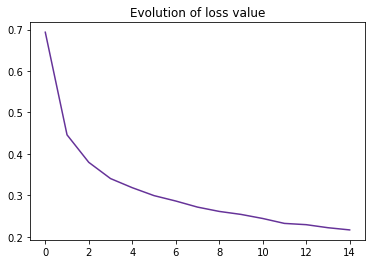

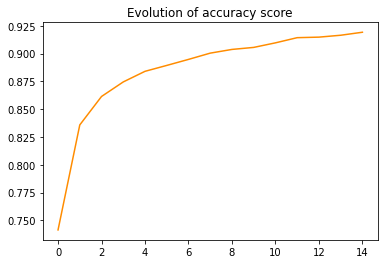

In [9]:
plt.plot(history1.history['loss'], c='rebeccapurple')
plt.title('Evolution of loss value')
plt.show()
print()
plt.plot(history1.history['accuracy'], c='darkorange')
plt.title('Evolution of accuracy score')
plt.show()

As previously, everyting looks good.

In [10]:
train_loss, train_acc = model1.evaluate(X_train_conv, y_train)
print(f'Training accuracy: {round(train_acc, 4)}')
print(f'Training loss: {round(train_loss, 4)}\n')

test_loss, test_acc = model1.evaluate(X_test_conv, y_test)
print(f'Test accuracy: {round(test_acc, 4)}')
print(f'Test loss: {round(test_loss, 4)}')

1875/1875 [==============================] - 19s 10ms/step - loss: 0.1673 - accuracy: 0.9365
Training accuracy: 0.9365
Training loss: 0.1673

313/313 [==============================] - 3s 10ms/step - loss: 0.2491 - accuracy: 0.9100
Test accuracy: 0.91
Test loss: 0.2491


It's better than previously - difference between test and train accuracy is smaller, but probably we could do better.

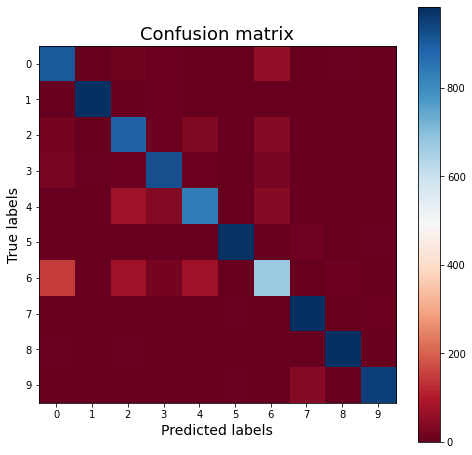

In [11]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf

y_pred = model1.predict(X_test_conv)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.argmax(y_test, axis=1)

cm = confusion_matrix(true_categories, predicted_categories)

fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(cm, cmap='RdBu')

ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)
ax.set_title('Confusion matrix', fontsize=18)

ax.set_xticks(list(range(10)))
ax.set_yticks(list(range(10)))

plt.colorbar(ax=ax)
plt.show()

As previously, classes **6** and **3** are the most problematic ones.

### Model2

We will add batch normalization to the previous model and train it a little bit longer.

In [12]:
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.2))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.2))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.BatchNormalization())

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.1))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(optimizer='Adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [13]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

In [14]:
history2 = model2.fit(X_train_conv, y_train, epochs=30, batch_size=128)

Epoch 1/30
469/469 [==============================] - 75s 159ms/step - loss: 0.7195 - accuracy: 0.7449
Epoch 2/30
469/469 [==============================] - 73s 156ms/step - loss: 0.3542 - accuracy: 0.8704
Epoch 3/30
469/469 [==============================] - 77s 164ms/step - loss: 0.3021 - accuracy: 0.8893
Epoch 4/30
469/469 [==============================] - 77s 163ms/step - loss: 0.2695 - accuracy: 0.9001
Epoch 5/30
469/469 [==============================] - 73s 156ms/step - loss: 0.2538 - accuracy: 0.9064
Epoch 6/30
469/469 [==============================] - 73s 156ms/step - loss: 0.2344 - accuracy: 0.9116
Epoch 7/30
469/469 [==============================] - 75s 159ms/step - loss: 0.2262 - accuracy: 0.9160
Epoch 8/30
469/469 [==============================] - 73s 155ms/step - loss: 0.2150 - accuracy: 0.9177
Epoch 9/30
469/469 [==============================] - 73s 156ms/step - loss: 0.2028 - accuracy: 0.9233
Epoch 10/30
469/469 [==============================] - 73s 156ms/step - l

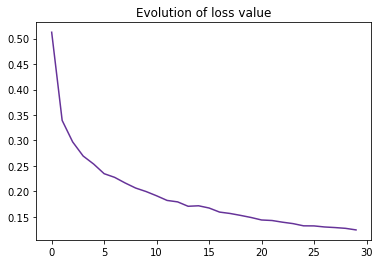

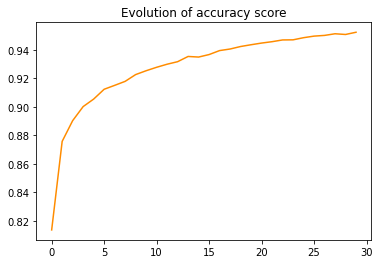

In [15]:
plt.plot(history2.history['loss'], c='rebeccapurple')
plt.title('Evolution of loss value')
plt.show()
print()
plt.plot(history2.history['accuracy'], c='darkorange')
plt.title('Evolution of accuracy score')
plt.show()

In [17]:
train_loss, train_acc = model2.evaluate(X_train_conv, y_train)
print(f'Training accuracy: {round(train_acc, 4)}')
print(f'Training loss: {round(train_loss, 4)}\n')

test_loss, test_acc = model2.evaluate(X_test_conv, y_test)
print(f'Test accuracy: {round(test_acc, 4)}')
print(f'Test loss: {round(test_loss, 4)}')

1875/1875 [==============================] - 23s 12ms/step - loss: 0.1316 - accuracy: 0.9502
Training accuracy: 0.9502
Training loss: 0.1316

313/313 [==============================] - 4s 13ms/step - loss: 0.3143 - accuracy: 0.9021
Test accuracy: 0.9021
Test loss: 0.3143


And we have even more overfitting! Let's try one last time.

### Model 3

We add even more dropout, but no batch normalization this time.

In [32]:
model3 = models.Sequential()

model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.25))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.2))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))

model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dropout(0.15))
model3.add(layers.Dense(10, activation='softmax'))

model3.compile(optimizer='Adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [33]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 64)         

In [34]:
history3 = model3.fit(X_train_conv, y_train, epochs=25, batch_size=128, validation_split=0.2)

Epoch 1/25
375/375 [==============================] - 45s 120ms/step - loss: 1.0660 - accuracy: 0.6163 - val_loss: 0.4795 - val_accuracy: 0.8291
Epoch 2/25
375/375 [==============================] - 44s 117ms/step - loss: 0.4970 - accuracy: 0.8146 - val_loss: 0.3818 - val_accuracy: 0.8676
Epoch 3/25
375/375 [==============================] - 44s 118ms/step - loss: 0.4218 - accuracy: 0.8485 - val_loss: 0.3507 - val_accuracy: 0.8718
Epoch 4/25
375/375 [==============================] - 44s 118ms/step - loss: 0.3792 - accuracy: 0.8604 - val_loss: 0.3165 - val_accuracy: 0.8846
Epoch 5/25
375/375 [==============================] - 45s 120ms/step - loss: 0.3487 - accuracy: 0.8706 - val_loss: 0.3101 - val_accuracy: 0.8859
Epoch 6/25
375/375 [==============================] - 45s 120ms/step - loss: 0.3221 - accuracy: 0.8818 - val_loss: 0.3001 - val_accuracy: 0.8904
Epoch 7/25
375/375 [==============================] - 44s 117ms/step - loss: 0.3140 - accuracy: 0.8846 - val_loss: 0.2806 - val_ac

In [35]:
train_loss, train_acc = model3.evaluate(X_train_conv, y_train)
print(f'Training accuracy: {round(train_acc, 4)}')
print(f'Training loss: {round(train_loss, 4)}\n')

test_loss, test_acc = model3.evaluate(X_test_conv, y_test)
print(f'Test accuracy: {round(test_acc, 4)}')
print(f'Test loss: {round(test_loss, 4)}')

1875/1875 [==============================] - 20s 10ms/step - loss: 0.1571 - accuracy: 0.9421
Training accuracy: 0.9421
Training loss: 0.1571

313/313 [==============================] - 3s 10ms/step - loss: 0.2503 - accuracy: 0.9140
Test accuracy: 0.914
Test loss: 0.2503


It's slightly better than one from lab (acc 0.914 vs 0.9095).

### Model 4

In [36]:
model4 = models.Sequential()

model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.25))

model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.25))

model4.add(layers.Conv2D(64, (3, 3), activation='relu'))

model4.add(layers.Flatten())
model4.add(layers.Dense(128, activation='relu'))
model4.add(layers.Dropout(0.15))
model4.add(layers.Dense(10, activation='softmax'))

model4.compile(optimizer='Adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [37]:
history4 = model4.fit(X_train_conv, y_train, epochs=25, batch_size=256, validation_split=0.15)

Epoch 1/25
200/200 [==============================] - 64s 316ms/step - loss: 1.1645 - accuracy: 0.5755 - val_loss: 0.5483 - val_accuracy: 0.7961
Epoch 2/25
200/200 [==============================] - 63s 315ms/step - loss: 0.5258 - accuracy: 0.8023 - val_loss: 0.4649 - val_accuracy: 0.8236
Epoch 3/25
200/200 [==============================] - 63s 313ms/step - loss: 0.4507 - accuracy: 0.8346 - val_loss: 0.3703 - val_accuracy: 0.8661
Epoch 4/25
200/200 [==============================] - 63s 313ms/step - loss: 0.3870 - accuracy: 0.8589 - val_loss: 0.3545 - val_accuracy: 0.8691
Epoch 5/25
200/200 [==============================] - 62s 311ms/step - loss: 0.3588 - accuracy: 0.8671 - val_loss: 0.3376 - val_accuracy: 0.8707
Epoch 6/25
200/200 [==============================] - 62s 312ms/step - loss: 0.3339 - accuracy: 0.8758 - val_loss: 0.3056 - val_accuracy: 0.8842
Epoch 7/25
200/200 [==============================] - 63s 315ms/step - loss: 0.3141 - accuracy: 0.8846 - val_loss: 0.3017 - val_ac

In [38]:
train_loss, train_acc = model4.evaluate(X_train_conv, y_train)
print(f'Training accuracy: {round(train_acc, 4)}')
print(f'Training loss: {round(train_loss, 4)}\n')

test_loss, test_acc = model4.evaluate(X_test_conv, y_test)
print(f'Test accuracy: {round(test_acc, 4)}')
print(f'Test loss: {round(test_loss, 4)}')

1875/1875 [==============================] - 26s 14ms/step - loss: 0.1402 - accuracy: 0.9498
Training accuracy: 0.9498
Training loss: 0.1402

313/313 [==============================] - 4s 13ms/step - loss: 0.2313 - accuracy: 0.9180
Test accuracy: 0.918
Test loss: 0.2313


**And that's the best model! Maybe if we trained it a little bit longer... or did data augumentation...**

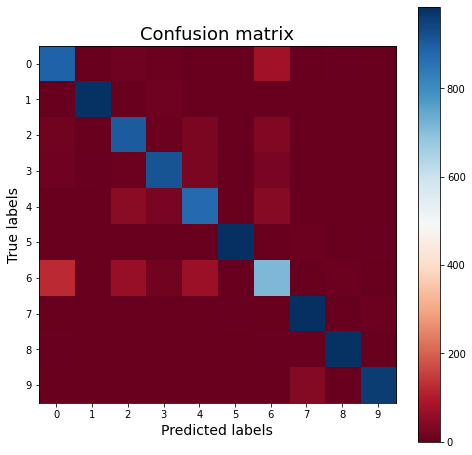

In [39]:
y_pred = model4.predict(X_test_conv)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.argmax(y_test, axis=1)

cm = confusion_matrix(true_categories, predicted_categories)

fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(cm, cmap='RdBu')

ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)
ax.set_title('Confusion matrix', fontsize=18)

ax.set_xticks(list(range(10)))
ax.set_yticks(list(range(10)))

plt.colorbar(ax=ax)
plt.show()